In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler, RobustScaler, Normalizer, TargetEncoder
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import classification_report, f1_score, roc_curve, precision_recall_curve, confusion_matrix, log_loss, balanced_accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, accuracy_score

from tqdm import tqdm
from IPython.display import display_html
from sklearn.svm import SVR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, PolynomialFeatures, MinMaxScaler,StandardScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer, SplineTransformer
from sklearn.linear_model import LogisticRegression, BayesianRidge, Ridge, Lasso 
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer, TransformedTargetRegressor
from sklearn.metrics import mean_absolute_percentage_error, make_scorer, mean_squared_error
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier

import category_encoders as ce

from tqdm import tqdm
from scipy.stats import gaussian_kde

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import load_breast_cancer

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection  import RFE
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
#import openpyxl as op
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.diagnostic as sm_diagnostic
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif ## тест на гетероскедастичность
#from stargazer.stargazer import Stargazer, LineLocation
#from stargazer.stargazer import HTMLRenderer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection  import RFE

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection  import RFE

In [2]:
df_train = pd.read_csv("train_house_B.csv")
df_test = pd.read_csv("test_house_B.csv")

display(df_train.head())
display(df_test.head())

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,2604000,1.222962,0.047686,-1.033389,-2.465344,0.831065,0.802990,1.590989,0.727946,0.893957,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063,1.307431
1,4900000,-0.091662,-0.356325,-0.486840,-2.465344,-0.126718,-0.024866,-0.323972,1.658337,1.751428,...,-0.141322,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618,-0.478408
2,4480000,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431
3,3234000,1.222962,-1.570692,-0.696696,0.405623,-0.670784,-0.024866,0.557116,-1.280083,1.273040,...,-0.141322,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063,-0.478408
4,3780000,-1.406286,-1.563680,-1.058295,0.405623,-0.126718,-0.879174,-1.649281,0.496669,0.255596,...,-0.141322,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063,-0.478408


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.091662,-0.499563,0.161178,0.405623,-0.126718,-0.024866,1.008138,-0.266271,-0.096935,0.167552,...,-0.141322,-0.554035,0.047278,1.421812,0.799192,0.355976,0.224410,1.536388,-0.679063,-0.478408
1,-0.091662,0.077002,0.419463,0.405623,-0.954152,-0.740055,-0.396757,-0.584346,0.759100,-0.581775,...,-0.141322,-0.554035,-1.308863,-0.570187,0.251399,0.355976,-0.929397,1.678171,-0.679063,1.307431
2,-1.406286,1.505583,0.853013,0.405623,-0.126718,2.326442,1.390701,1.495469,-1.667171,-1.525251,...,3.136137,-0.554035,0.047278,1.421812,0.463905,1.517692,2.532024,1.340759,1.472618,-0.478408
3,1.222962,1.387026,0.668524,0.405623,1.006754,-0.024866,0.732728,-0.053591,-1.773094,0.276236,...,-0.141322,1.804941,1.403419,1.421812,0.241826,0.355976,0.224410,0.644806,1.472618,-0.478408
4,-0.091662,-1.159181,0.391790,0.405623,0.666712,1.346730,0.048737,-1.351088,0.638630,0.483270,...,3.136137,-0.554035,1.403419,1.421812,-0.440720,0.355976,2.532024,-0.730109,1.472618,3.093270


# Дупликаты

In [3]:
display(len(df_train) - len(df_train.drop_duplicates()))
df_train.drop_duplicates(inplace=True)
display(len(df_train) - len(df_train.drop_duplicates()))

0

0

# Features

In [4]:
X, y = df_train.drop(columns='price'), df_train['price']
X.shape

(408, 29)

# Итоговые выбранные фичи

In [5]:
important_features = ['0', '2', '3', '5', '7', '8', '11', '12', '13', '15', '16', '17', '18',
       '19', '20', '21', '22', '24', '25', '27', '28']

print(important_features)

['0', '2', '3', '5', '7', '8', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '24', '25', '27', '28']


In [6]:
X = X[important_features].copy()
df_test = df_test[important_features].copy()
X.columns == df_test.columns # проверяем, что все колонки равны

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

# Формирование итогового pipeline для решения задачи

In [7]:
pipe_Lasso = TransformedTargetRegressor(
    regressor = Pipeline([
        ('estimator', Lasso(alpha=0.03))
    ]),
    transformer=PowerTransformer(method='box-cox')
)

pipe_GB = TransformedTargetRegressor(
    regressor = Pipeline([
        ('estimator', GradientBoostingRegressor(n_estimators=100,
                                                learning_rate=0.1,
                                               max_depth=2,
                                               min_samples_split=15,
                                               min_samples_leaf=6,
                                               subsample=0.3))
    ]),
    transformer=PowerTransformer(method='box-cox')
)

pipe_SVR = TransformedTargetRegressor(
    regressor = Pipeline([
        ('estimator', SVR(C=0.5))
    ]),
    transformer=PowerTransformer(method='box-cox')
)

eclf = VotingRegressor(
    estimators=[('lasso', pipe_Lasso), ('gnb', pipe_GB), ('SVR', pipe_SVR)])

In [8]:
eclf.fit(X, y)

VotingRegressor(estimators=[('lasso',
                             TransformedTargetRegressor(regressor=Pipeline(steps=[('estimator',
                                                                                   Lasso(alpha=0.03))]),
                                                        transformer=PowerTransformer(method='box-cox'))),
                            ('gnb',
                             TransformedTargetRegressor(regressor=Pipeline(steps=[('estimator',
                                                                                   GradientBoostingRegressor(max_depth=2,
                                                                                                             min_samples_leaf=6,
                                                                                                             min_samples_split=15,
                                                                                                             subsample=0.3))]),
                                                        transformer=PowerTransformer(method='box-cox'))),
                            ('SVR',
                             TransformedTargetRegressor(regressor=Pipeline(steps=[('estimator',
                                                                                   SVR(C=0.5))]),
                                                        transformer=PowerTransformer(method='box-cox')))])

In [9]:
final_pred = eclf.predict(df_test)
y_predict = final_pred

(137,) (137,)
Отрицательные цены -  0
Max Error: 4,630,004
 
----------------------
   MAPE Error: 15.65
----------------------


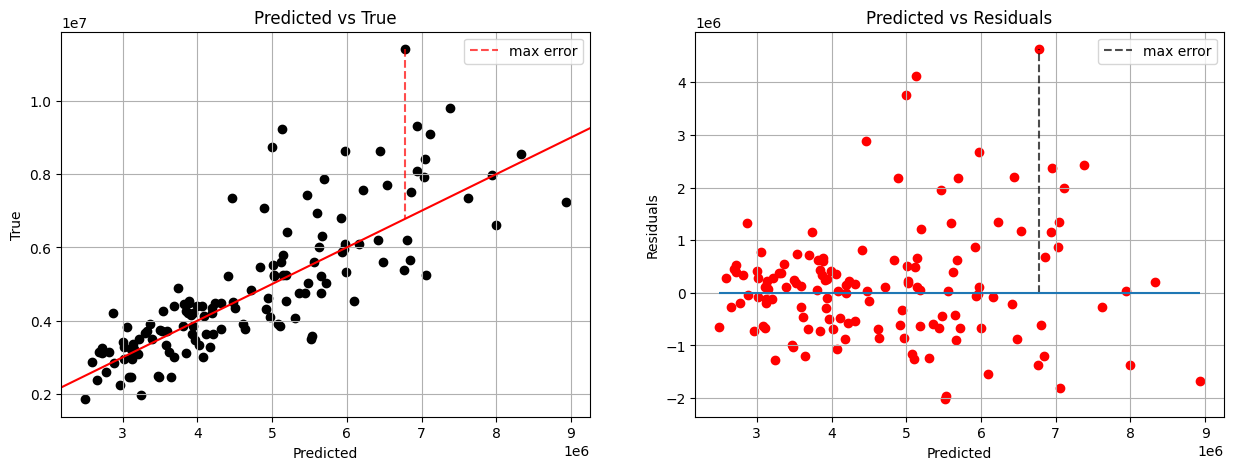

In [10]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_B.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [11]:
mask = important_features

import pickle
with open('saved_dictionary_b.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,10,1
1,27,airconditioning
2,2,area
3,12,area bathrooms
4,4,area bedrooms
5,5,area stories
6,15,basement
7,22,bathrooms
8,19,bathrooms stories
9,21,bedrooms
